In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_train = pathlib.Path("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_test = pathlib.Path("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=(batch_size))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
import tensorflow as tf
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_test,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=(batch_size))

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=(batch_size))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


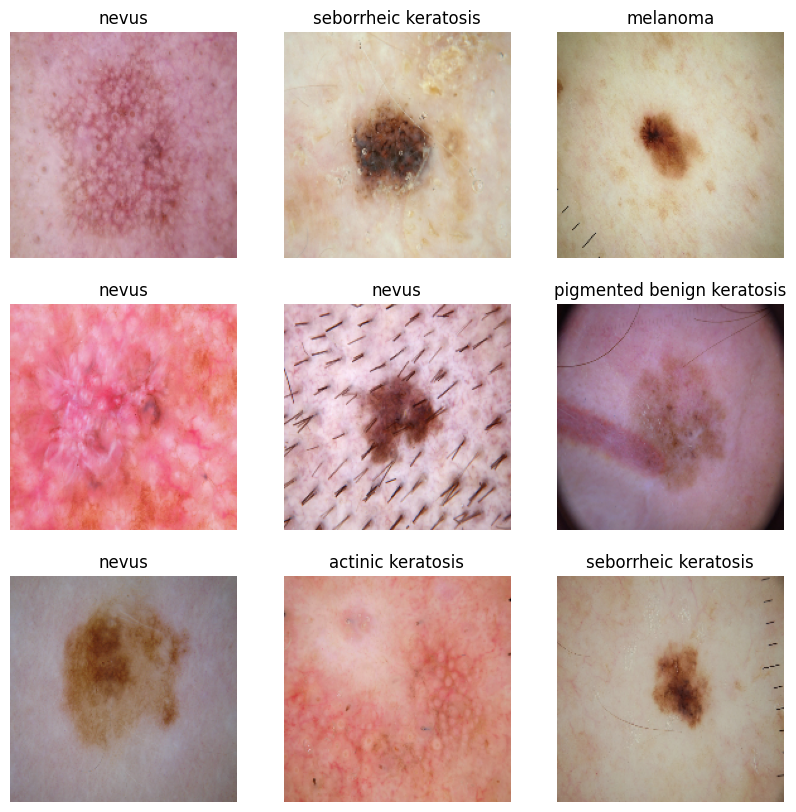

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 9 # As target class has 9 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 285s 2s/step - loss: 1.9761 - accuracy: 0.2729 - val_loss: 1.8198 - val_accuracy: 0.3557
Epoch 2/25
56/56 [==============================] - 45s 803ms/step - loss: 1.6632 - accuracy: 0.4001 - val_loss: 1.5268 - val_accuracy: 0.4698
Epoch 3/25
56/56 [==============================] - 42s 756ms/step - loss: 1.5387 - accuracy: 0.4554 - val_loss: 1.4792 - val_accuracy: 0.5145
Epoch 4/25
56/56 [==============================] - 42s 759ms/step - loss: 1.3464 - accuracy: 0.5218 - val_loss: 1.3643 - val_accuracy: 0.5436
Epoch 5/25
56/56 [==============================] - 42s 755ms/step - loss: 1.2894 - accuracy: 0.5474 - val_loss: 1.3376 - val_accuracy: 0.5436
Epoch 6/25
56/56 [==============================] - 43s 774ms/step - loss: 1.1667 - accuracy: 0.5982 - val_loss: 1.3912 - val_accuracy: 0.5481
Epoch 7/25
56/56 [==============================] - 42s 758ms/step - loss: 1.1127 - accuracy: 0.6055 - val_loss: 1.4594 - val_accuracy: 0.5078
E

In [ ]:
model.save('model.h5')

In [ ]:
import json
from joblib import dump, load

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json.dump(model_json, json_file)

dump(model_json, 'seq_model.json')

['seq_model.json']

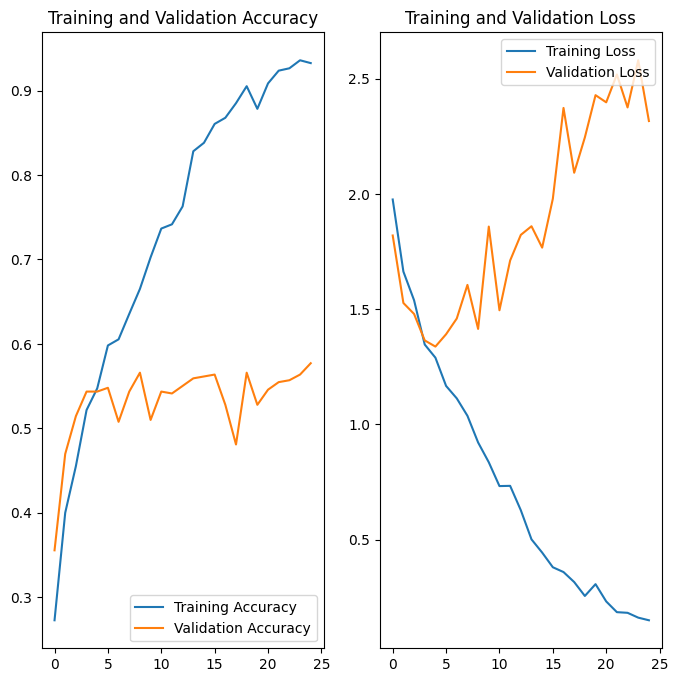

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

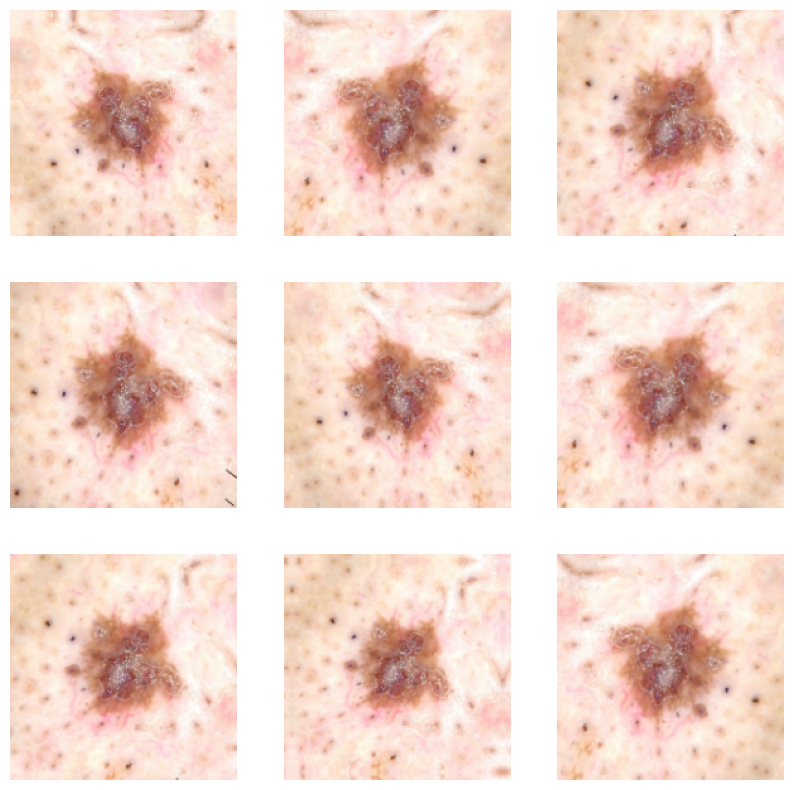

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
56/56 [==============================] - 50s 869ms/step - loss: 2.2668 - accuracy: 0.2227 - val_loss: 1.9393 - val_accuracy: 0.3199
Epoch 2/25
56/56 [==============================] - 50s 892ms/step - loss: 1.7815 - accuracy: 0.3527 - val_loss: 1.8025 - val_accuracy: 0.3691
Epoch 3/25
56/56 [==============================] - 51s 899ms/step - loss: 1.6206 - accuracy: 0.4090 - val_loss: 1.5242 - val_accuracy: 0.4787
Epoch 4/25
56/56 [==============================] - 51s 921ms/step - loss: 1.5081 - accuracy: 0.4487 - val_loss: 1.4675 - val_accuracy: 0.5235
Epoch 5/25
56/56 [==============================] - 49s 875ms/step - loss: 1.4484 - accuracy: 0.4855 - val_loss: 1.4716 - val_accuracy: 0.4899
Epoch 6/25
56/56 [==============================] - 50s 896ms/step - loss: 1.3976 - accuracy: 0.5112 - val_loss: 1.4660 - val_accuracy: 0.5034
Epoch 7/25
56/56 [==============================] - 50s 897ms/step - loss: 1.3626 - accuracy: 0.5190 - val_loss: 1.3744 - val_accuracy: 0.5123

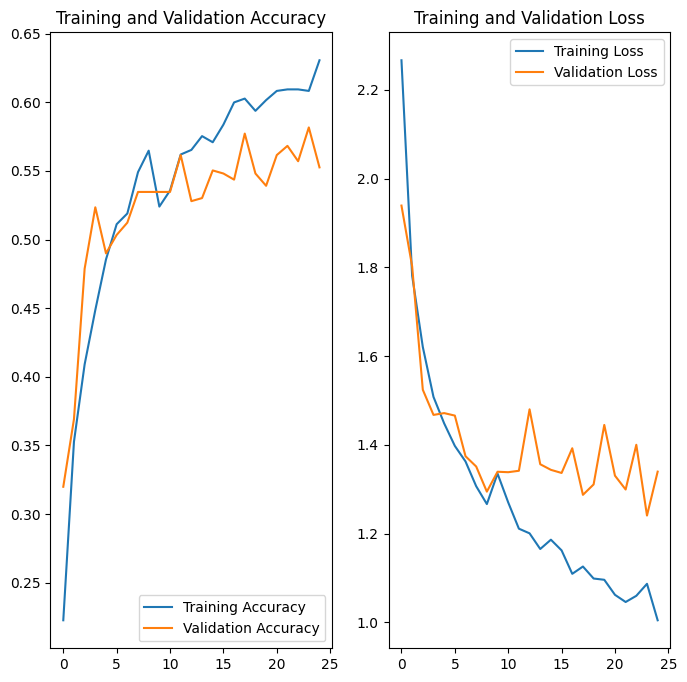

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_train, '*', '*.jpg')) ]
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [ ]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg', 'actinic keratosis'), ('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026626.jpg', 'actinic keratosis')]


In [ ]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis


In [ ]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

Predictions:
 [1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0]
Labels:
 [8 3 2 7 1 2 4 4 3 4 0 5 1 5 0 4 2 5 0 4 3 7 4 0 2 5 5 0 1 3 4 3]


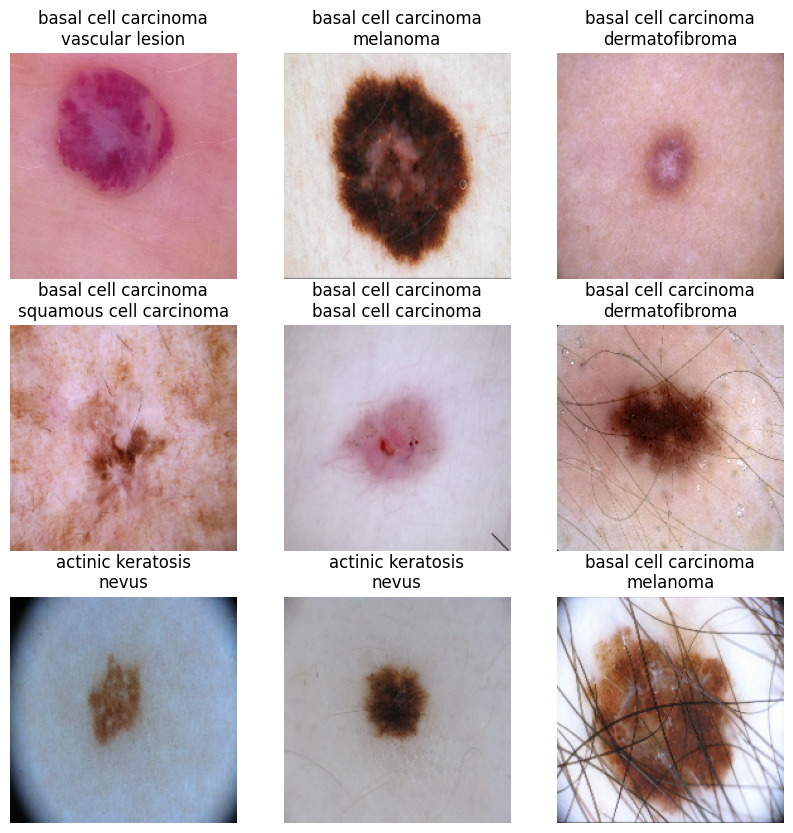

In [ ]:
#Retrieve a batch of images
image_batch, label_batch =test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")